<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/cont/001_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn  
Website: [https://scikit-learn.org/](https://scikit-learn.org/)

In [0]:
# !pip install --upgrade scikit-learn

In [1]:
import numpy as np
import pandas as pd
import sklearn
sklearn.__version__

'0.22.1'

In [0]:
data = {'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
        'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
        'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
        'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
        'weight': [500, 450, 300, np.nan, 410, np.nan],
        'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']}

df_raw = pd.DataFrame(data=data)
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
size      5 non-null object
color     6 non-null object
gender    5 non-null object
price     5 non-null float64
weight    4 non-null float64
bought    6 non-null object
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


In [0]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [0]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [0]:
df.isnull().sum().sum()

5

In [0]:
df.isnull().sum() / len(df)

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

In [0]:
from sklearn.impute import SimpleImputer

# strategy: 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [0]:
imputer.statistics_

array([415.])

In [0]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [0]:
df['weight'] = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [0]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [0]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [0]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [0]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [0]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [0]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [0]:
pd.isnull(df['weight'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: weight, dtype: bool

In [0]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [0]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [0]:
pd.notnull(df['weight'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: weight, dtype: bool

In [0]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [0]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [0]:
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199,500,yes
1,L,green,male,89,450,no
2,M,blue,brak,brak,300,yes
3,brak,green,female,129,brak,no
4,M,red,female,79,410,yes
5,M,green,male,89,brak,no


In [0]:
df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0,0.0,300.0,yes
3,0,green,female,129.0,0.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,0.0,no


In [0]:
df['size'].fillna(value='L', inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [0]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


### Szeregi czasowe

In [61]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


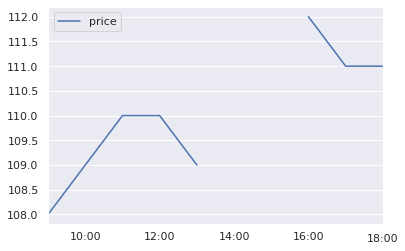

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

_ = df.plot()

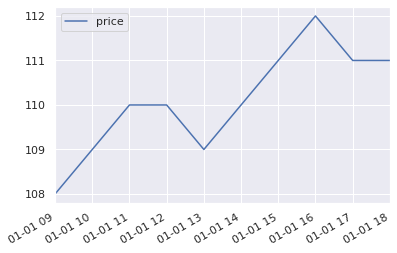

In [63]:
dff = df.dropna()
_ = dff.plot()

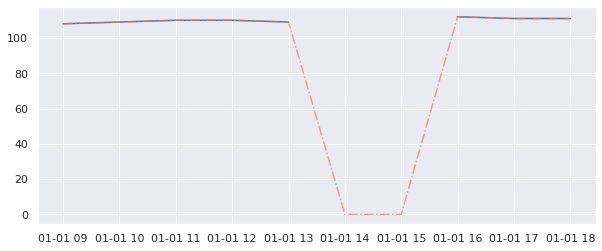

In [72]:
plt.figure(figsize=(10, 4))
plt.plot(df.price)
price_fill = df['price'].fillna(0)
plt.plot(price_fill, ls='-.', alpha=0.7)

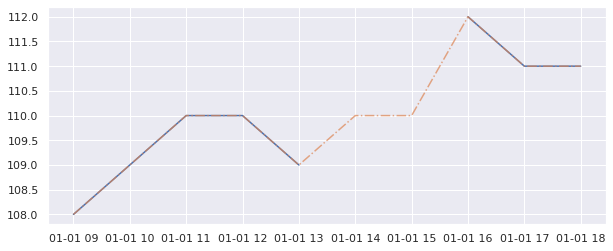

In [73]:
plt.figure(figsize=(10, 4))
plt.plot(df.price)
price_fill = df['price'].fillna(df['price'].mean())
plt.plot(price_fill, ls='-.', alpha=0.7)

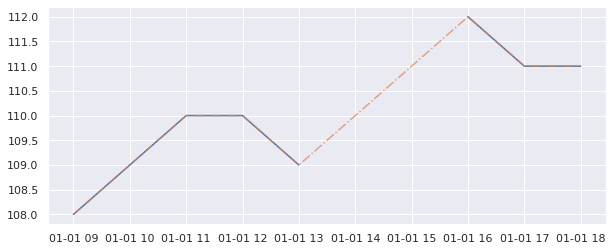

In [74]:
plt.figure(figsize=(10, 4))
plt.plot(df.price)
price_fill = df['price'].interpolate()
plt.plot(price_fill, ls='-.', alpha=0.7)

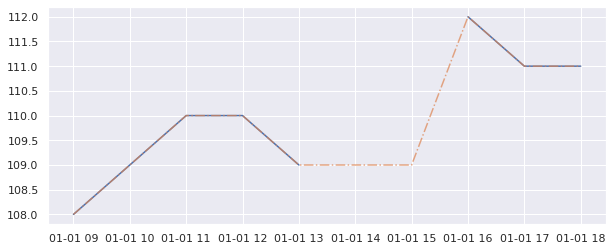

In [75]:
plt.figure(figsize=(10, 4))
plt.plot(df.price)
price_fill = df['price'].fillna(method='ffill')
plt.plot(price_fill, ls='-.', alpha=0.7)

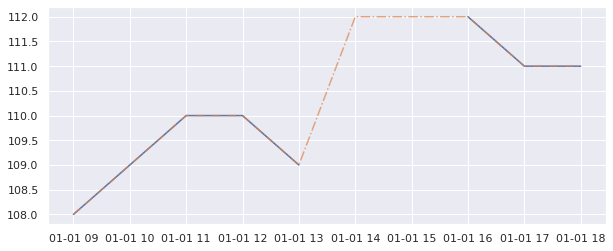

In [76]:
plt.figure(figsize=(10, 4))
plt.plot(df.price)
price_fill = df['price'].fillna(method='bfill')
plt.plot(price_fill, ls='-.', alpha=0.7)